### 1) Imports & global stuff

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib import gridspec
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

from tqdm import tqdm

In [2]:
# Some settings for pd and jupyter
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 20)

In [3]:
HYDROPHOBICS = ['LEU', 'ILE', 'PHE', 'TYR', 'TRP', 'CYS', 'MET']
POSITIVES = ['LYS', 'HIS', 'ARG']
NEGATIVES = ['ASP', 'GLU']

<br>
<br>

### 2) Importing datasets & prepare

In [4]:
# Import protrusion data
periph_protrusion_data = pd.read_csv("../results_and_feature_datasets/periph_protrusion_data.csv", sep="\t", encoding="utf-8", index_col=0)
periph_protrusion_data = periph_protrusion_data.drop(columns=["idx"])

tm_protrusion_data = pd.read_csv("../results_and_feature_datasets/tm_protrusion_data.csv", sep="\t", encoding="utf-8", index_col=0)
tm_protrusion_data = tm_protrusion_data.drop(columns=["idx"])

In [5]:
# Take care of NaN values (som chain_id)
periph_protrusion_data = periph_protrusion_data.replace(np.nan, '', regex=True)
tm_protrusion_data = tm_protrusion_data.replace(np.nan, '', regex=True)

In [6]:
# Import neighbourhood data
periph_neighbourhood_data = pd.read_csv("../results_and_feature_datasets/periph_neighbourhood_data.csv", sep="\t", encoding="utf-8", index_col=0)
tm_neighbourhood_data = pd.read_csv("../results_and_feature_datasets/tm_neighbourhood_data.csv", sep="\t", encoding="utf-8", index_col=0)

/home/florian/miniconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
# Take care of NaN values (som chain_id)
periph_neighbourhood_data = periph_neighbourhood_data.replace(np.nan, '', regex=True)
tm_neighbourhood_data = tm_neighbourhood_data.replace(np.nan, '', regex=True)

In [8]:
# Import sasa data
periph_sasa_data = pd.read_csv("../results_and_feature_datasets/periph_sasa_data.csv", sep="\t", encoding="utf-8", index_col=0)
tm_sasa_data = pd.read_csv("../results_and_feature_datasets/tm_sasa_data.csv", sep="\t", encoding="utf-8", index_col=0)

In [9]:
# Take care of NaN values (som chain_id)
periph_sasa_data = periph_sasa_data.replace(np.nan, '', regex=True)
tm_sasa_data = tm_sasa_data.replace(np.nan, '', regex=True)

In [10]:
# Building matching ids for neighbourhood tables (NB! Takes ca. 2 minutes)
periph_neighbourhood_data["matching_id"] = periph_neighbourhood_data["pdb"] + "-" + periph_neighbourhood_data["residue_name"] + "-" + \
    periph_neighbourhood_data["residue_number"].astype(str) + "-" + periph_neighbourhood_data["chain_id"]
periph_neighbourhood_data["parent_matching_id"] = periph_neighbourhood_data["pdb"] + "-" + periph_neighbourhood_data["parent_residue_name"] + "-" + \
    periph_neighbourhood_data["parent_residue_number"].astype(str) + "-" + periph_neighbourhood_data["parent_residue_chain_id"]

tm_neighbourhood_data["matching_id"] = tm_neighbourhood_data["pdb"] + "-" + tm_neighbourhood_data["residue_name"] + "-" + \
    tm_neighbourhood_data["residue_number"].astype(str) + "-" + tm_neighbourhood_data["chain_id"]
tm_neighbourhood_data["parent_matching_id"] = tm_neighbourhood_data["pdb"] + "-" + tm_neighbourhood_data["parent_residue_name"] + "-" + \
    tm_neighbourhood_data["parent_residue_number"].astype(str) + "-" + tm_neighbourhood_data["parent_residue_chain_id"]

In [11]:
# Building matching ids for protrusion data
periph_protrusion_data["matching_id"] = periph_protrusion_data["pdb"] + "-" + periph_protrusion_data["residue_name"] + "-" + \
    periph_protrusion_data["residue_number"].astype(str) + "-" + periph_protrusion_data["chain_id"]

tm_protrusion_data["matching_id"] = tm_protrusion_data["pdb"] + "-" + tm_protrusion_data["residue_name"] + "-" + \
    tm_protrusion_data["residue_number"].astype(str) + "-" + tm_protrusion_data["chain_id"]

In [12]:
# Building matching ids for sasa data
periph_sasa_data["matching_id"] = periph_sasa_data["pdb"] + "-" + periph_sasa_data["residue_name"] + "-" + \
    periph_sasa_data["residue_number"].astype(str) + "-" + periph_sasa_data["chain_id"]

tm_sasa_data["matching_id"] = tm_sasa_data["pdb"] + "-" + tm_sasa_data["residue_name"] + "-" + \
    tm_sasa_data["residue_number"].astype(str) + "-" + tm_sasa_data["chain_id"]

<br>
<br>

### 3.1) The neighbourhood of hydrophobic protrusions

In [67]:
# Periph -- neighbourhood of hydrophobic protrusions
matching_id = periph_protrusion_data.query("is_hydrophobic_protrusion > 0")["matching_id"].to_numpy()
periph_result = periph_neighbourhood_data.query("parent_matching_id in @matching_id")
print "Mean number of neighbours - periph: " + str(float(len(periph_result))/float(len(matching_id)))

# Tm -- neighbourhood of hydrophobic protrusions
matching_id = tm_protrusion_data.query("is_hydrophobic_protrusion > 0")["matching_id"].to_numpy()
tm_result = tm_neighbourhood_data.query("parent_matching_id in @matching_id")
print "Mean number of neighbours - tm: " + str(float(len(tm_result))/float(len(matching_id)))

Mean number of neighbours - periph: 8.54946524064
Mean number of neighbours - tm: 8.4735915493


In [68]:
dd = periph_result["residue_name"].value_counts(normalize = True).mul(100)
dd = dd.reset_index().sort_values("index")
dd.columns = ["residue_name", "percentage"]
dd["Dataset"] = "peripheral protein dataset"

dd2 = tm_result["residue_name"].value_counts(normalize = True).mul(100)
dd2 = dd2.reset_index().sort_values("index")
dd2.columns = ["residue_name", "percentage"]
dd2["Dataset"] = "reference dataset"

dd = dd.append(dd2)

# ===

foo = pd.merge(dd.query("Dataset == 'peripheral protein dataset'"), dd.query("Dataset == 'reference dataset'"), on="residue_name")
foo["diff1"] = foo["percentage_x"] - foo["percentage_y"]
foo = foo[["residue_name", "diff1"]]
foo["data"] = "periph"
foo["data"][foo["diff1"] < 0] = "ref"

/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


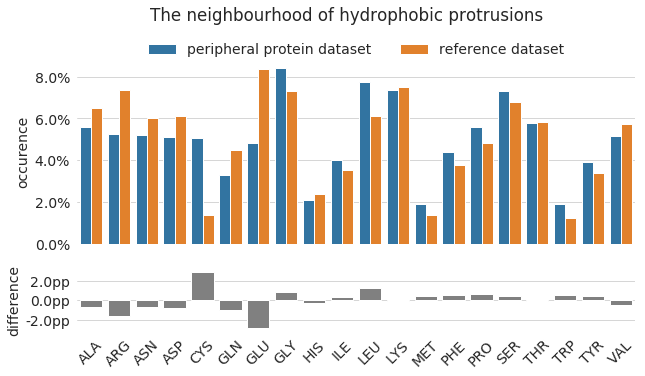

In [279]:
fig = plt.figure(figsize=(10, 5))
font = {'family': 'normal', 'weight': 'normal', 'size': 14}
plt.rc('font', **font)

fig.suptitle("The neighbourhood of hydrophobic protrusions", y=1.025)

gs = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[3, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# ===============

sns.set_style("whitegrid")
sns.barplot(x="residue_name", y="percentage", hue="Dataset", data=dd, ax=ax0)
sns.despine(left=True, bottom=True)

ax0.set_xlabel("")
ax0.set_ylabel("occurence")
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax0.tick_params("x", rotation=45)
lgd = ax0.legend(bbox_to_anchor=(0.5, 1.05), loc="center", borderaxespad=0, ncol=2, frameon=False)

## ===============

#sns.set_style("whitegrid")
sns.barplot(x="residue_name", y="diff1", data=foo, color="grey", ax=ax1) #palette=["darkorange" if(x < 0) else "steelblue" for x in foo["diff1"].to_numpy()])
sns.despine(left=True, bottom=True)

ax1.set_xlabel("")
ax1.set_ylabel("difference")
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d.0pp'))
ax1.tick_params("x", rotation=45)

plt.savefig("../the_neighbourhood_of_hydrophobic_protrusions.png", dpi=120, bbox_inches='tight') #bbox_extra_artists=(lgd,)
#plt.show()

In [44]:
foo = pd.merge(dd.query("Dataset == 'peripheral protein dataset'"), dd.query("Dataset == 'reference dataset'"), on="residue_name")
foo["diff"] = foo["percentage_x"] - foo["percentage_y"]
foo = foo[["residue_name", "percentage_x", "percentage_y", "diff"]]
#foo = foo.sort_values("diff", ascending=False).reset_index(drop=True)
foo.columns = ["Residue name", "Periph. rel. %", "Referance rel. %", "Difference"]
foo.T

0        1         2        3        4        5   \
Residue name           ALA      ARG       ASN      ASP      CYS      GLN   
Periph. rel. %     5.60594  5.27365    5.2111  5.08991  5.05473  3.31118   
Referance rel. %   6.48244   7.3343   6.00457  6.12923  1.39206  4.50862   
Difference       -0.876501 -2.06065 -0.793469 -1.03932  3.66267 -1.19744   

                       6        7         8         9        10        11  \
Residue name          GLU      GLY       HIS       ILE      LEU       LYS   
Periph. rel. %    4.84363  8.42455   2.10711   4.01095  7.74042   7.34167   
Referance rel. %  8.35238  7.31353   2.38936    3.5321  6.10846   7.47974   
Difference       -3.50875  1.11102 -0.282247  0.478845  1.63197 -0.138069   

                        12       13        14        15         16        17  \
Residue name           MET      PHE       PRO       SER        THR       TRP   
Periph. rel. %     1.90774  4.40579    5.5864   7.29085    5.77013   1.90774   
Referance rel. %   1.39206  3.78143   4.82028    6.7941    5.83835   1.22585   
Difference        0.515677  0.62436  0.766117  0.496753 -0.0682215  0.681894   

                        18        19  
Residue name           TYR       VAL  
Periph. rel. %     3.93667   5.17983  
Referance rel. %   3.38666   5.73447  
Difference        0.550008 -0.554641

<br>
<br>
<br>

In [13]:
matching_id = periph_protrusion_data.query("is_hydrophobic_protrusion > 0")["matching_id"].to_numpy()

hydr_result = []
pos_result = []
neg_result = []
neigh_result = []

for sample in tqdm(matching_id, total=len(matching_id)):
    data = periph_neighbourhood_data.query("parent_matching_id == @sample")
    if(len(data) == 0):
        hydr_result.append(-1)
        pos_result.append(-1)
        neg_result.append(-1)
        continue
    
    size = len(data)
    hydr = len(data[data["residue_name"].isin(HYDROPHOBICS)])
    pos = len(data[data["residue_name"].isin(POSITIVES)])
    neg = len(data[data["residue_name"].isin(NEGATIVES)])

    hydr_result.append(float(hydr)/float(size)*100)
    pos_result.append(float(pos)/float(size)*100)
    neg_result.append(float(neg)/float(size)*100)
    neigh_result.append(size)
    
periph_hydrophobic_protrusions_extended = periph_protrusion_data.query("is_hydrophobic_protrusion > 0")
periph_hydrophobic_protrusions_extended = periph_hydrophobic_protrusions_extended[["pdb", "residue_number", "residue_name", "matching_id"]]
periph_hydrophobic_protrusions_extended["neighbourhood_hydrophobicity"] = hydr_result
periph_hydrophobic_protrusions_extended["neighbourhood_positivity"] = pos_result
periph_hydrophobic_protrusions_extended["neighbourhood_negativity"] = neg_result
periph_hydrophobic_protrusions_extended["num_of_neighbour_residues"] = neigh_result
del(hydr_result, pos_result, neg_result, neigh_result, matching_id, sample, data)

100%|██████████| 2992/2992 [08:29<00:00,  5.87it/s]


In [14]:
matching_id = tm_protrusion_data.query("is_hydrophobic_protrusion > 0")["matching_id"].to_numpy()

hydr_result = []
pos_result = []
neg_result = []
neigh_result = []

for sample in tqdm(matching_id, total=len(matching_id)):
    data = tm_neighbourhood_data.query("parent_matching_id == @sample")
    if(len(data) == 0):
        hydr_result.append(0)
        pos_result.append(0)
        neg_result.append(0)
        continue
    
    size = len(data)
    hydr = len(data[data["residue_name"].isin(HYDROPHOBICS)])
    pos = len(data[data["residue_name"].isin(POSITIVES)])
    neg = len(data[data["residue_name"].isin(NEGATIVES)])

    hydr_result.append(float(hydr)/float(size)*100)
    pos_result.append(float(pos)/float(size)*100)
    neg_result.append(float(neg)/float(size)*100)
    neigh_result.append(size)
    
tm_hydrophobic_protrusions_extended = tm_protrusion_data.query("is_hydrophobic_protrusion > 0")
tm_hydrophobic_protrusions_extended = tm_hydrophobic_protrusions_extended[["pdb", "residue_number", "residue_name", "matching_id"]]
tm_hydrophobic_protrusions_extended["neighbourhood_hydrophobicity"] = hydr_result
tm_hydrophobic_protrusions_extended["neighbourhood_positivity"] = pos_result
tm_hydrophobic_protrusions_extended["neighbourhood_negativity"] = neg_result
tm_hydrophobic_protrusions_extended["num_of_neighbour_residues"] = neigh_result
del(hydr_result, pos_result, neg_result, neigh_result, matching_id, sample, data)

100%|██████████| 568/568 [02:53<00:00,  3.28it/s]


In [147]:
periph_hydrophobic_protrusions_extended

pdb  residue_number residue_name     matching_id  \
63      1kcm              72          PHE   1kcm-PHE-72-A   
66      1kcm              75          MET   1kcm-MET-75-A   
67      1kcm              76          LEU   1kcm-LEU-76-A   
190     1kcm             204          TRP  1kcm-TRP-204-A   
249     1tgx               7          ILE    1tgx-ILE-7-B   
252     1tgx              10          PHE   1tgx-PHE-10-B   
272     1tgx              31          MET   1tgx-MET-31-B   
287     1tgx              47          LEU   1tgx-LEU-47-B   
288     1tgx              48          LEU   1tgx-LEU-48-B   
338     3tgo              64          PHE   3tgo-PHE-64-A   
...      ...             ...          ...             ...   
233245  3npe             371          LEU  3npe-LEU-371-A   
233555  1jss             124          LEU  1jss-LEU-124-A   
233620  1jss             196          MET  1jss-MET-196-A   
233649  2xu0              15          LEU   2xu0-LEU-15-A   
233949  2xu0             368          LEU  2xu0-LEU-368-A   
234102  3d34               8          ILE    3d34-ILE-8-A   
234129  3d34              36          LEU   3d34-LEU-36-A   
234130  3d34              37          PHE   3d34-PHE-37-A   
234168  3d34              78          TRP   3d34-TRP-78-A   
234262  3d34             179          ILE  3d34-ILE-179-A   

        neighbourhood_hydrophobicity  neighbourhood_positivity  \
63                         28.571429                 14.285714   
66                         20.000000                 10.000000   
67                         20.000000                 10.000000   
190                        40.000000                 20.000000   
249                        27.272727                 27.272727   
252                        36.363636                 27.272727   
272                         0.000000                  0.000000   
287                        33.333333                 33.333333   
288                        33.333333                 22.222222   
338                        25.000000                 12.500000   
...                              ...                       ...   
233245                     33.333333                 11.111111   
233555                     42.857143                  0.000000   
233620                     37.500000                 12.500000   
233649                     18.181818                  9.090909   
233949                     14.285714                 14.285714   
234102                     20.000000                 20.000000   
234129                     22.222222                 11.111111   
234130                     25.000000                 12.500000   
234168                     27.272727                  9.090909   
234262                     11.111111                  0.000000   

        neighbourhood_negativity  num_of_neighbour_residues  
63                      0.000000                          7  
66                      0.000000                         10  
67                      0.000000                         10  
190                     0.000000                          5  
249                     0.000000                         11  
252                     0.000000                         11  
272                     0.000000                          6  
287                     0.000000                          6  
288                     0.000000                          9  
338                    12.500000                          8  
...                          ...                        ...  
233245                 11.111111                          9  
233555                  0.000000                          7  
233620                  0.000000                          8  
233649                  9.090909                         11  
233949                 42.857143                          7  
234102                 20.000000                         10  
234129                  0.000000                          9  
234130                  0.000000   

In [171]:
tmp = periph_hydrophobic_protrusions_extended[["neighbourhood_hydrophobicity", "neighbourhood_positivity", "neighbourhood_negativity"]]
tmp.columns = ["hydrophobes", "positive", "negative"]
tmp["dataset"] = "peripheral protein dataset"

tmp2 = tm_hydrophobic_protrusions_extended[["neighbourhood_hydrophobicity", "neighbourhood_positivity", "neighbourhood_negativity"]]
tmp2.columns = ["hydrophobes", "positive", "negative"]
tmp2["dataset"] = "reference dataset"

/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [172]:
fig = plt.figure(figsize=(10, 8))
font = {'family': 'normal', 'weight': 'normal', 'size': 14}
plt.rc('font', **font)

fig.suptitle("Neighbourhoods hydrophobicity and charge \n (neighbourhoods of hydr. protrusions)", y=1.025)

gs = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1, 1])
gs.update(wspace=0.025, hspace=0.05) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# ===============

sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.boxplot(data=tmp.append(tmp2).melt(id_vars=["dataset"]), x="variable", y="value", hue="dataset", ax=ax0)
sns.despine(left=True, bottom=True)

ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
lgd = ax0.legend(bbox_to_anchor=(0.5, 1.1), loc="center", borderaxespad=0, ncol=2, frameon=False)

## ===============

sns.violinplot(data=tmp.append(tmp2).melt(id_vars=["dataset"]), x="variable", y="value", hue="dataset", split=True, bw=0.1, ax=ax1)
sns.despine(left=True, bottom=True)

ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax1.tick_params("x", rotation=45)
ax1.legend().remove()

plt.savefig("../neighbourhood_properties_of_hydrophobic_protrusions.png", dpi=120, bbox_inches='tight')
#plt.show()

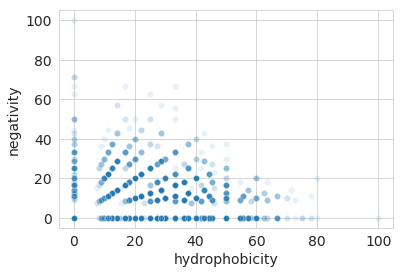

In [44]:
sns.scatterplot(data=tmp, x="hydrophobicity", y="positivity", alpha=0.1)
plt.show()

sns.scatterplot(data=tmp, x="hydrophobicity", y="negativity", alpha=0.1)
plt.show()

sns.scatterplot(data=tmp, x="positivity", y="negativity", alpha=0.1)
plt.show()

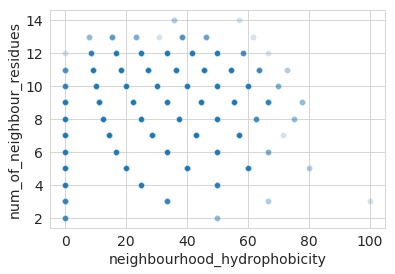

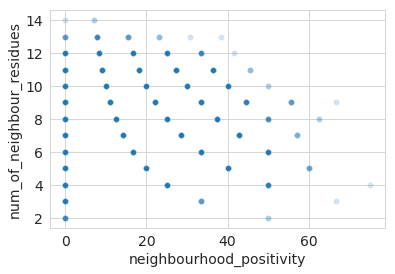

In [46]:
sns.scatterplot(data=periph_hydrophobic_protrusions_extended, x="neighbourhood_hydrophobicity", y="num_of_neighbour_residues", alpha=0.2)
plt.show()

sns.scatterplot(data=periph_hydrophobic_protrusions_extended, x="neighbourhood_positivity", y="num_of_neighbour_residues", alpha=0.2)
plt.show()

sns.scatterplot(data=periph_hydrophobic_protrusions_extended, x="neighbourhood_negativity", y="num_of_neighbour_residues", alpha=0.2)
plt.show()

In [73]:
len(tm_hydrophobic_protrusions_extended.query("neighbourhood_hydrophobicity > 0 & neighbourhood_positivity == neighbourhood_negativity & neighbourhood_positivity == 0"))

30

In [74]:
print "hydrophobicity + positivity > negativity: " + str(200.0/568.0*100)
print "hydrophobicity + positivity < negativity: " + str(155.0/568.0*100)
print "hydrophobicity + positivity == negativity: " + str(30.0/568.0*100)
print "hydrophobicity + positivity == negativity: " + str(298.0/2992.0*100)

hydrophobicity + positivity > negativity: 35.2112676056
hydrophobicity + positivity < negativity: 27.2887323944
hydrophobicity + positivity == negativity: 5.28169014085
hydrophobicity + positivity == negativity: 9.95989304813


In [69]:
periph_hydrophobic_protrusions_extended

pdb  residue_number residue_name     matching_id  \
63      1kcm              72          PHE   1kcm-PHE-72-A   
66      1kcm              75          MET   1kcm-MET-75-A   
67      1kcm              76          LEU   1kcm-LEU-76-A   
190     1kcm             204          TRP  1kcm-TRP-204-A   
249     1tgx               7          ILE    1tgx-ILE-7-B   
252     1tgx              10          PHE   1tgx-PHE-10-B   
272     1tgx              31          MET   1tgx-MET-31-B   
287     1tgx              47          LEU   1tgx-LEU-47-B   
288     1tgx              48          LEU   1tgx-LEU-48-B   
338     3tgo              64          PHE   3tgo-PHE-64-A   
...      ...             ...          ...             ...   
233245  3npe             371          LEU  3npe-LEU-371-A   
233555  1jss             124          LEU  1jss-LEU-124-A   
233620  1jss             196          MET  1jss-MET-196-A   
233649  2xu0              15          LEU   2xu0-LEU-15-A   
233949  2xu0             368          LEU  2xu0-LEU-368-A   
234102  3d34               8          ILE    3d34-ILE-8-A   
234129  3d34              36          LEU   3d34-LEU-36-A   
234130  3d34              37          PHE   3d34-PHE-37-A   
234168  3d34              78          TRP   3d34-TRP-78-A   
234262  3d34             179          ILE  3d34-ILE-179-A   

        neighbourhood_hydrophobicity  neighbourhood_positivity  \
63                         28.571429                 14.285714   
66                         20.000000                 10.000000   
67                         20.000000                 10.000000   
190                        40.000000                 20.000000   
249                        27.272727                 27.272727   
252                        36.363636                 27.272727   
272                         0.000000                  0.000000   
287                        33.333333                 33.333333   
288                        33.333333                 22.222222   
338                        25.000000                 12.500000   
...                              ...                       ...   
233245                     33.333333                 11.111111   
233555                     42.857143                  0.000000   
233620                     37.500000                 12.500000   
233649                     18.181818                  9.090909   
233949                     14.285714                 14.285714   
234102                     20.000000                 20.000000   
234129                     22.222222                 11.111111   
234130                     25.000000                 12.500000   
234168                     27.272727                  9.090909   
234262                     11.111111                  0.000000   

        neighbourhood_negativity  num_of_neighbour_residues  
63                      0.000000                          7  
66                      0.000000                         10  
67                      0.000000                         10  
190                     0.000000                          5  
249                     0.000000                         11  
252                     0.000000                         11  
272                     0.000000                          6  
287                     0.000000                          6  
288                     0.000000                          9  
338                    12.500000                          8  
...                          ...                        ...  
233245                 11.111111                          9  
233555                  0.000000                          7  
233620                  0.000000                          8  
233649                  9.090909                         11  
233949                 42.857143                          7  
234102                 20.000000                         10  
234129                  0.000000                          9  
234130                  0.000000   

<br>
<br>

### 3.2) The exposed neighbourhood of hydrophobic protrusions

In [280]:
# Periph -- neighbourhood of hydrophobic protrusions
matching_id = periph_protrusion_data.query("is_hydrophobic_protrusion > 0")["matching_id"].to_numpy()
periph_result = periph_neighbourhood_data.query("parent_matching_id in @matching_id")
matching_id = periph_result["matching_id"]
periph_sasa = periph_sasa_data.query("matching_id in @matching_id")
periph_result = pd.merge(periph_result, periph_sasa[["matching_id", "sasa_percentage"]], on="matching_id")
periph_result = periph_result.query("sasa_percentage >= 20")

# Tm -- neighbourhood of hydrophobic protrusions
matching_id = tm_protrusion_data.query("is_hydrophobic_protrusion > 0")["matching_id"].to_numpy()
tm_result = tm_neighbourhood_data.query("parent_matching_id in @matching_id")
matching_id = tm_result["matching_id"]
tm_sasa = tm_sasa_data.query("matching_id in @matching_id")
tm_result = pd.merge(tm_result, tm_sasa[["matching_id", "sasa_percentage"]], on="matching_id")
tm_result = tm_result.query("sasa_percentage >= 20")

In [281]:
ddd1 = periph_result["residue_name"].value_counts(normalize = True).mul(100)
ddd1 = ddd1.reset_index().sort_values("index")
ddd1.columns = ["residue_name", "percentage"]
ddd1["Dataset"] = "peripheral protein dataset"

ddd2 = tm_result["residue_name"].value_counts(normalize = True).mul(100)
ddd2 = ddd2.reset_index().sort_values("index")
ddd2.columns = ["residue_name", "percentage"]
ddd2["Dataset"] = "reference dataset"

ddd = ddd1.append(ddd2)

# ===

foo = pd.merge(ddd.query("Dataset == 'peripheral protein dataset'"), ddd.query("Dataset == 'reference dataset'"), on="residue_name")
foo["diff1"] = foo["percentage_x"] - foo["percentage_y"]
foo = foo[["residue_name", "diff1"]]
foo["data"] = "periph"
foo["data"][foo["diff1"] < 0] = "ref"

/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


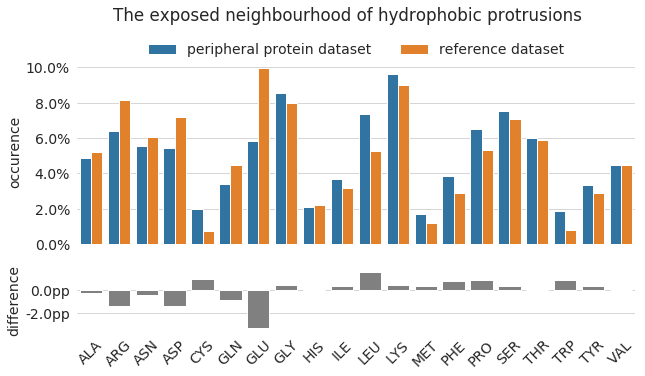

In [269]:
fig = plt.figure(figsize=(10, 5))
font = {'family': 'normal', 'weight': 'normal', 'size': 14}
plt.rc('font', **font)

fig.suptitle("The exposed neighbourhood of hydrophobic protrusions", y=1.025)

gs = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[3, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# ===============

sns.set_style("whitegrid")
sns.barplot(x="residue_name", y="percentage", hue="Dataset", data=ddd, ax=ax0)
sns.despine(left=True)

ax0.set_xlabel("")
ax0.set_ylabel("occurence")
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax0.tick_params("x", rotation=45)
lgd = ax0.legend(bbox_to_anchor=(0.5, 1.05), loc="center", borderaxespad=0, ncol=2, frameon=False)

## ===============

#sns.set_style("whitegrid")
sns.barplot(x="residue_name", y="diff1", data=foo, color="grey", ax=ax1) #palette=["darkorange" if(x < 0) else "steelblue" for x in foo["diff1"].to_numpy()])
sns.despine(left=True, bottom=True)

ax1.set_xlabel("")
ax1.set_ylabel("difference")
#ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d.0pp'))
ax1.tick_params("x", rotation=45)
#ax1.set_ylim([-4.9,2.5])


plt.savefig("../the_exposed_neighbourhood_of_hydrophobic_protrusions.png", dpi=120, bbox_inches='tight')
#plt.show()

In [283]:
dd = dd.reset_index(drop=True)
ddd = ddd.reset_index(drop=True)

ddd["notExposedPercentage"] = dd["percentage"]
ddd["diff"] = ddd["percentage"] - ddd["notExposedPercentage"]

In [285]:
plt.figure(figsize=(10, 4))
font = {'family': 'normal', 'weight': 'normal', 'size': 14}
plt.rc('font', **font)

sns.set_style("whitegrid")

sns.barplot(y="diff", x="residue_name", hue="Dataset", data=ddd)
sns.despine(left=True, bottom=True)

plt.title("Changes from the whole neighbourhood to the exposed neighbourhood\n(changes in percent points from figure 4.3.1 to figure 4.3.3)", y=1.15)
plt.ylabel("changes")
plt.xlabel("")

#plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%d.0pp'))

lgd = plt.legend(bbox_to_anchor=(0.5, 1.065), loc="center", borderaxespad=0, ncol=2, frameon=False)
plt.xticks(rotation=45)

plt.savefig("../exposed_neighbourhood_vs_neighbourhood2.png", dpi=120, bbox_inches='tight')
#plt.show()

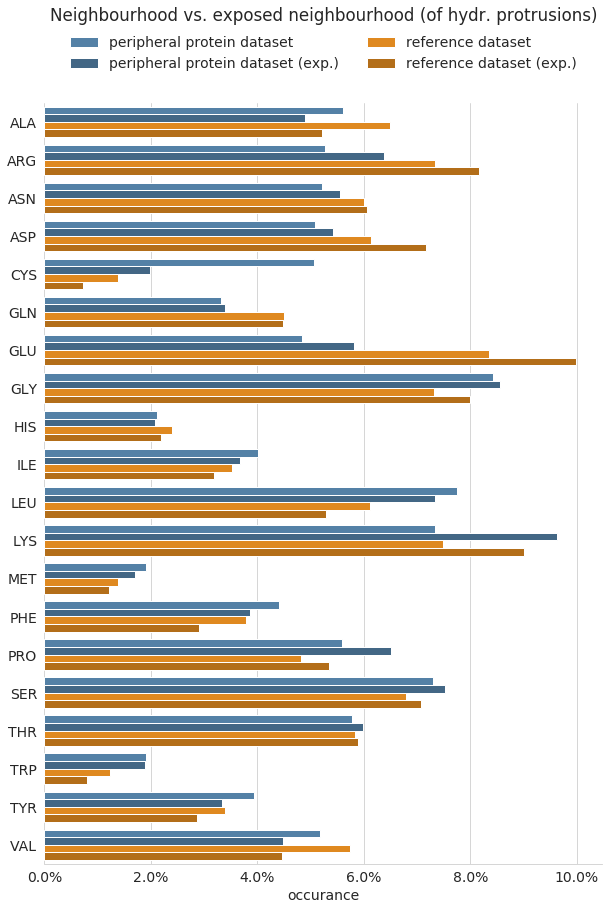

In [135]:
ddd["Dataset"] = "peripheral protein dataset (exp.)"
ddd2["Dataset"] = "reference dataset (exp.)"

plt.figure(figsize=(10, 14))
font = {'family': 'normal', 'weight': 'normal', 'size': 14}
plt.rc('font', **font)

sns.set_style("whitegrid")

sns.barplot(y="residue_name", x="percentage", hue="Dataset", data=dd.append(ddd.append(ddd2)).sort_values(["Dataset", "residue_name"]), palette=["steelblue", "#386890", "darkorange", "#cc7000"])
sns.despine(left=True)

plt.title("Neighbourhood vs. exposed neighbourhood (of hydr. protrusions)", y=1.1)
plt.xlabel("occurance")
plt.ylabel("")

plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())

lgd = plt.legend(bbox_to_anchor=(0.5, 1.065), loc="center", borderaxespad=0, ncol=2, frameon=False)
#plt.xticks(rotation=45)

plt.savefig("../exposed_neighbourhood_vs_neighbourhood.png", dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
#plt.show()

In [205]:
# Computing hydrophobicity, positivity & negativity
matching_id = periph_protrusion_data.query("is_hydrophobic_protrusion > 0")["matching_id"].to_numpy()

hydr_result = []
pos_result = []
neg_result = []
neigh_result = []

for sample in tqdm(matching_id, total=len(matching_id)):
    data = periph_result.query("parent_matching_id == @sample")
    if(len(data) == 0):
        hydr_result.append(-1)
        pos_result.append(-1)
        neg_result.append(-1)
        continue
    
    size = len(data)
    hydr = len(data[data["residue_name"].isin(HYDROPHOBICS)])
    pos = len(data[data["residue_name"].isin(POSITIVES)])
    neg = len(data[data["residue_name"].isin(NEGATIVES)])

    hydr_result.append(float(hydr)/float(size)*100)
    pos_result.append(float(pos)/float(size)*100)
    neg_result.append(float(neg)/float(size)*100)
    neigh_result.append(size)
    
periph_hydrophobic_protrusions_extended = periph_protrusion_data.query("is_hydrophobic_protrusion > 0")
periph_hydrophobic_protrusions_extended = periph_hydrophobic_protrusions_extended[["pdb", "residue_number", "residue_name", "matching_id"]]
periph_hydrophobic_protrusions_extended["exposed_neighbourhood_hydrophobicity"] = hydr_result
periph_hydrophobic_protrusions_extended["exposed_neighbourhood_positivity"] = pos_result
periph_hydrophobic_protrusions_extended["exposed_neighbourhood_negativity"] = neg_result
periph_hydrophobic_protrusions_extended["num_of_neighbour_residues"] = neigh_result
del(hydr_result, pos_result, neg_result, neigh_result, matching_id, sample, data)

100%|██████████| 2992/2992 [00:29<00:00, 102.91it/s]


In [206]:
# Computing hydrophobicity, positivity & negativity
matching_id = tm_protrusion_data.query("is_hydrophobic_protrusion > 0")["matching_id"].to_numpy()

hydr_result = []
pos_result = []
neg_result = []
neigh_result = []

for sample in tqdm(matching_id, total=len(matching_id)):
    data = tm_result.query("parent_matching_id == @sample")
    if(len(data) == 0):
        hydr_result.append(0)
        pos_result.append(0)
        neg_result.append(0)
        neigh_result.append(0)
        continue
    
    size = len(data)
    hydr = len(data[data["residue_name"].isin(HYDROPHOBICS)])
    pos = len(data[data["residue_name"].isin(POSITIVES)])
    neg = len(data[data["residue_name"].isin(NEGATIVES)])

    hydr_result.append(float(hydr)/float(size)*100)
    pos_result.append(float(pos)/float(size)*100)
    neg_result.append(float(neg)/float(size)*100)
    neigh_result.append(size)
    
tm_hydrophobic_protrusions_extended = tm_protrusion_data.query("is_hydrophobic_protrusion > 0")
tm_hydrophobic_protrusions_extended = tm_hydrophobic_protrusions_extended[["pdb", "residue_number", "residue_name", "matching_id"]]
tm_hydrophobic_protrusions_extended["exposed_neighbourhood_hydrophobicity"] = hydr_result
tm_hydrophobic_protrusions_extended["exposed_neighbourhood_positivity"] = pos_result
tm_hydrophobic_protrusions_extended["exposed_neighbourhood_negativity"] = neg_result
tm_hydrophobic_protrusions_extended["num_of_neighbour_residues"] = neigh_result
del(hydr_result, pos_result, neg_result, neigh_result, matching_id, sample, data)

100%|██████████| 568/568 [00:05<00:00, 111.53it/s]


In [209]:
tmp = periph_hydrophobic_protrusions_extended[["exposed_neighbourhood_hydrophobicity", "exposed_neighbourhood_positivity", "exposed_neighbourhood_negativity"]]
tmp.columns = ["hydrophobes", "positive", "negative"]
tmp["dataset"] = "peripheral protein dataset"

tmp2 = tm_hydrophobic_protrusions_extended[["exposed_neighbourhood_hydrophobicity", "exposed_neighbourhood_positivity", "exposed_neighbourhood_negativity"]]
tmp2.columns = ["hydrophobes", "positive", "negative"]
tmp2["dataset"] = "reference dataset"

/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


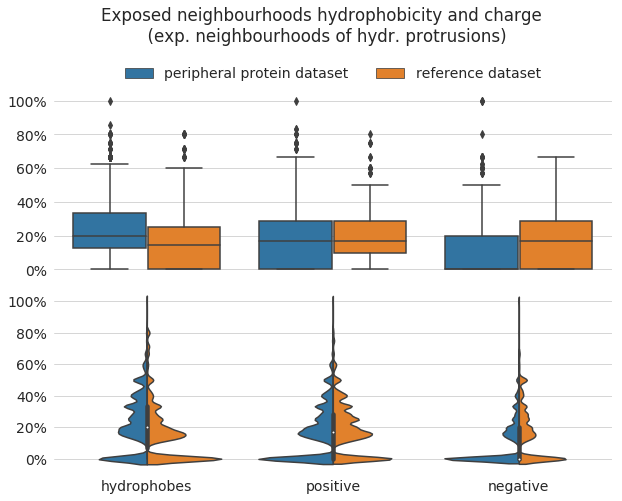

In [217]:
fig = plt.figure(figsize=(10, 7))
font = {'family': 'normal', 'weight': 'normal', 'size': 14}
plt.rc('font', **font)

fig.suptitle("Exposed neighbourhoods hydrophobicity and charge \n (exp. neighbourhoods of hydr. protrusions)", y=1.05)

gs = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1, 1])
gs.update(wspace=0.025, hspace=0.05) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# ===============

sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.boxplot(data=tmp.append(tmp2).melt(id_vars=["dataset"]), x="variable", y="value", hue="dataset", ax=ax0)
sns.despine(left=True, bottom=True)

ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
lgd = ax0.legend(bbox_to_anchor=(0.5, 1.1), loc="center", borderaxespad=0, ncol=2, frameon=False)

## ===============

sns.violinplot(data=tmp.append(tmp2).melt(id_vars=["dataset"]), x="variable", y="value", hue="dataset", split=True, bw=0.1, ax=ax1)
sns.despine(left=True, bottom=True)

ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax1.tick_params("x", rotation=45)
ax1.legend().remove()

plt.savefig("../exposed_neighbourhood_properties_of_hydrophobic_protrusions_box.png", dpi=120, bbox_inches='tight')
#plt.show()

In [180]:
print "hydrophobicity + positivity > negativity: " + str(1081.0/2992*100)
print "hydrophobicity + positivity < negativity: " + str(514.0/2992*100)
print "hydrophobicity + positivity == negativity: " + str(317.0/2992*100)
print "hydrophobicity + positivity == negativity == 0: " + str(386/2992.0*100)
print "other: " + str(694.0/2992.0*100)

print "hydrophobicity + positivity > negativity: " + str(161.0/568.0*100)
print "hydrophobicity + positivity < negativity: " + str(125.0/568.0*100)
print "hydrophobicity + positivity == negativity: " + str(43.0/568.0*100)
print "hydrophobicity + positivity == negativity == 0: " + str(43.0/568.0*100)
print "other: " + str(196.0/568.0*100)

hydrophobicity + positivity > negativity: 36.1296791444
hydrophobicity + positivity < negativity: 17.179144385
hydrophobicity + positivity == negativity: 10.5949197861
hydrophobicity + positivity == negativity == 0: 12.9010695187
other: 23.1951871658
hydrophobicity + positivity > negativity: 28.3450704225
hydrophobicity + positivity < negativity: 22.0070422535
hydrophobicity + positivity == negativity: 7.57042253521
hydrophobicity + positivity == negativity == 0: 7.57042253521
other: 34.5070422535


In [172]:
len(tm_hydrophobic_protrusions_extended)

568

In [166]:
len(periph_hydrophobic_protrusions_extended.query("(exposed_neighbourhood_hydrophobicity > 0)").query("exposed_neighbourhood_positivity == exposed_neighbourhood_negativity").query("exposed_neighbourhood_negativity > 0"))

317

<br>
<br>

### 3.3 Periph co-insertable, solvent neighbourhood vs. TM exposed non-protrusions, solvent neighbourhood. 

In [73]:
# Periph -- neighbourhood of co-insertables
matching_id = periph_protrusion_data.query("is_co_insertable > 0")["matching_id"].to_numpy()
periph_result = periph_neighbourhood_data.query("parent_matching_id in @matching_id")
matching_id = periph_result["matching_id"]
periph_sasa = periph_sasa_data.query("matching_id in @matching_id")
periph_result = pd.merge(periph_result, periph_sasa[["matching_id", "sasa_percentage"]], on="matching_id")
periph_result = periph_result.query("sasa_percentage >= 20")

# Tm -- prep
nan = np.nan
def func(row):
    if row["l_limit"] is not None and row["u_limit"] is not None:
        if row["z_coord"] < row["l_limit"] or row["z_coord"] > row["u_limit"]:
            return True
    elif row["l_limit"] is not None:
        if row["z_coord"] < row["l_limit"]:
            return True
    elif row["u_limit"] is not None:
        if row["z_coord"] > row["u_limit"]:
            return True
    return False

# tm - only hydrophobes & non-protrusions & only within limit & only exposed hydrophobes
tm_result = tm_protrusion_data.query("residue_name in @HYDROPHOBICS & is_protrusion == 0")
matching_id = tm_result[tm_result.apply(func = func, axis = 1)]["matching_id"].to_numpy()
tm_sasa = tm_sasa_data.query("matching_id in @matching_id")
tm_matching_id = tm_sasa.query("sasa_percentage >= 20")["matching_id"]

# tm - exposed neighbourhood of interest
tm_result = tm_neighbourhood_data.query("parent_matching_id in @tm_matching_id")
matching_id = tm_result["matching_id"]
tm_sasa = tm_sasa_data.query("matching_id in @matching_id")
tm_result = pd.merge(tm_result, tm_sasa[["matching_id", "sasa_percentage"]], on="matching_id")
tm_result = tm_result.query("sasa_percentage >= 20")

In [70]:
dddd1 = periph_result["residue_name"].value_counts(normalize = True).mul(100)
dddd1 = dddd1.reset_index().sort_values("index")
dddd1.columns = ["residue_name", "percentage"]
dddd1["Dataset"] = "peripheral protein dataset"

dddd2 = tm_result["residue_name"].value_counts(normalize = True).mul(100)
dddd2 = dddd2.reset_index().sort_values("index")
dddd2.columns = ["residue_name", "percentage"]
dddd2["Dataset"] = "reference dataset"

dddd = dddd1.append(dddd2)

# ===

foo = pd.merge(dddd.query("Dataset == 'peripheral protein dataset'"), dddd.query("Dataset == 'reference dataset'"), on="residue_name")
foo["diff1"] = foo["percentage_x"] - foo["percentage_y"]
foo = foo[["residue_name", "diff1"]]
foo["data"] = "periph"
foo["data"][foo["diff1"] < 0] = "ref"

/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


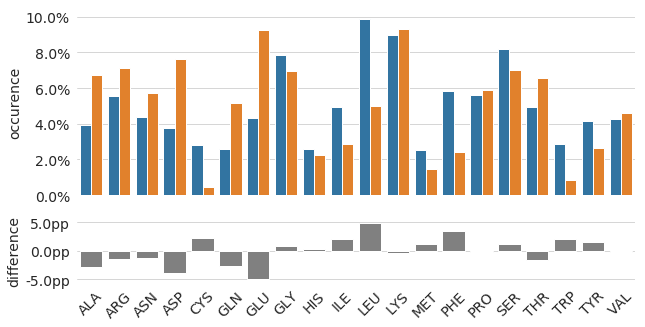

In [88]:
fig = plt.figure(figsize=(10, 5))
font = {'family': 'normal', 'weight': 'normal', 'size': 14}
plt.rc('font', **font)

#fig.suptitle("The exposed neighbourhood of hydrophobic protrusions", y=1.025)

gs = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[3, 1])
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# ===============

sns.set_style("whitegrid")
sns.barplot(x="residue_name", y="percentage", hue="Dataset", data=dddd, ax=ax0)
sns.despine(left=True)

ax0.set_xlabel("")
ax0.set_ylabel("occurence")
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
#lgd = ax0.legend(bbox_to_anchor=(0.5, 1.05), loc="center", borderaxespad=0, ncol=2, frameon=False)
ax0.get_legend().remove()

## ===============

sns.barplot(x="residue_name", y="diff1", data=foo, color="grey", ax=ax1) #palette=["darkorange" if(x < 0) else "steelblue" for x in foo["diff1"].to_numpy()])
sns.despine(left=True, bottom=True)

ax1.set_xlabel("")
ax1.set_ylabel("difference")
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d.0pp'))
ax1.tick_params("x", rotation=45)


plt.savefig("../the_exposed_neighbourhood_of_co_insertables_and_non-protrusion_hydrophobes.png", dpi=120, bbox_inches='tight')
#plt.show()

In [71]:
dd = dd.reset_index(drop=True)
dddd = dddd.reset_index(drop=True)

dddd["notExposedPercentage"] = dd["percentage"]
dddd["diff"] = dddd["percentage"] - dddd["notExposedPercentage"]

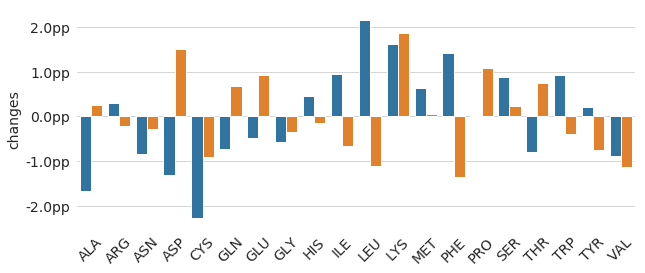

In [89]:
plt.figure(figsize=(10, 4))
font = {'family': 'normal', 'weight': 'normal', 'size': 14}
plt.rc('font', **font)

sns.set_style("whitegrid")

sns.barplot(y="diff", x="residue_name", hue="Dataset", data=dddd)
sns.despine(left=True, bottom=True)

plt.ylabel("changes")
plt.xlabel("")

plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%d.0pp'))
plt.legend('',frameon=False)
plt.xticks(rotation=45)

plt.savefig("../the_exposed_neighbourhood_of_co_insertables_and_non-protrusion_hydrophobes_changes_from_overall_neighbourhood.png", dpi=120, bbox_inches='tight')
#plt.show()

In [77]:
# Computing hydrophobicity, positivity & negativity
matching_id = periph_protrusion_data.query("is_co_insertable > 0")["matching_id"].to_numpy()

hydr_result = []
pos_result = []
neg_result = []
neigh_result = []

for sample in tqdm(matching_id, total=len(matching_id)):
    data = periph_result.query("parent_matching_id == @sample")
    if(len(data) == 0):
        hydr_result.append(-1)
        pos_result.append(-1)
        neg_result.append(-1)
        continue
    
    size = len(data)
    hydr = len(data[data["residue_name"].isin(HYDROPHOBICS)])
    pos = len(data[data["residue_name"].isin(POSITIVES)])
    neg = len(data[data["residue_name"].isin(NEGATIVES)])

    hydr_result.append(float(hydr)/float(size)*100)
    pos_result.append(float(pos)/float(size)*100)
    neg_result.append(float(neg)/float(size)*100)
    neigh_result.append(size)
    
periph_hydrophobic_protrusions_extended = periph_protrusion_data.query("is_co_insertable > 0")
periph_hydrophobic_protrusions_extended = periph_hydrophobic_protrusions_extended[["pdb", "residue_number", "residue_name", "matching_id"]]
periph_hydrophobic_protrusions_extended["exposed_neighbourhood_hydrophobicity"] = hydr_result
periph_hydrophobic_protrusions_extended["exposed_neighbourhood_positivity"] = pos_result
periph_hydrophobic_protrusions_extended["exposed_neighbourhood_negativity"] = neg_result
periph_hydrophobic_protrusions_extended["num_of_neighbour_residues"] = neigh_result
del(hydr_result, pos_result, neg_result, neigh_result, matching_id, sample, data)


# Computing hydrophobicity, positivity & negativity
matching_id = tm_matching_id

hydr_result = []
pos_result = []
neg_result = []
neigh_result = []

for sample in tqdm(matching_id, total=len(matching_id)):
    data = tm_result.query("parent_matching_id == @sample")
    if(len(data) == 0):
        hydr_result.append(0)
        pos_result.append(0)
        neg_result.append(0)
        neigh_result.append(0)
        continue
    
    size = len(data)
    hydr = len(data[data["residue_name"].isin(HYDROPHOBICS)])
    pos = len(data[data["residue_name"].isin(POSITIVES)])
    neg = len(data[data["residue_name"].isin(NEGATIVES)])

    hydr_result.append(float(hydr)/float(size)*100)
    pos_result.append(float(pos)/float(size)*100)
    neg_result.append(float(neg)/float(size)*100)
    neigh_result.append(size)
    
tm_hydrophobic_protrusions_extended = tm_protrusion_data.query("matching_id in @matching_id")
tm_hydrophobic_protrusions_extended = tm_hydrophobic_protrusions_extended[["pdb", "residue_number", "residue_name", "matching_id"]]
tm_hydrophobic_protrusions_extended["exposed_neighbourhood_hydrophobicity"] = hydr_result
tm_hydrophobic_protrusions_extended["exposed_neighbourhood_positivity"] = pos_result
tm_hydrophobic_protrusions_extended["exposed_neighbourhood_negativity"] = neg_result
tm_hydrophobic_protrusions_extended["num_of_neighbour_residues"] = neigh_result
del(hydr_result, pos_result, neg_result, neigh_result, matching_id, sample, data)

100%|██████████| 11936/11936 [02:36<00:00, 76.17it/s]


In [78]:
tmp = periph_hydrophobic_protrusions_extended[["exposed_neighbourhood_hydrophobicity", "exposed_neighbourhood_positivity", "exposed_neighbourhood_negativity"]]
tmp.columns = ["hydrophobes", "positive", "negative"]
tmp["dataset"] = "peripheral protein dataset"

tmp2 = tm_hydrophobic_protrusions_extended[["exposed_neighbourhood_hydrophobicity", "exposed_neighbourhood_positivity", "exposed_neighbourhood_negativity"]]
tmp2.columns = ["hydrophobes", "positive", "negative"]
tmp2["dataset"] = "reference dataset"

/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


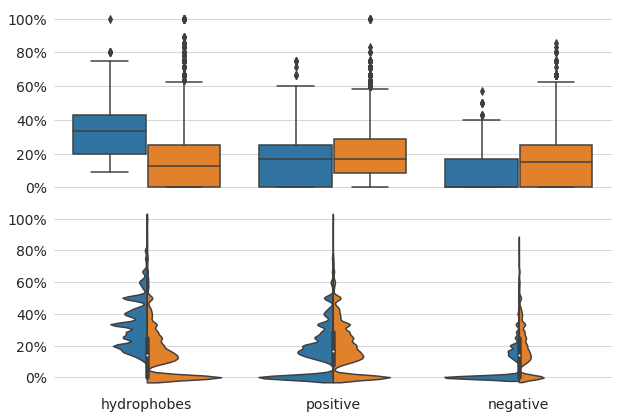

In [90]:
fig = plt.figure(figsize=(10, 7))
font = {'family': 'normal', 'weight': 'normal', 'size': 14}
plt.rc('font', **font)

#fig.suptitle("Exposed neighbourhoods hydrophobicity and charge \n (exp. neighbourhoods of hydr. protrusions)", y=1.05)

gs = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1, 1])
gs.update(wspace=0.025, hspace=0.05) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# ===============

sns.set_style("whitegrid")
sns.set_style("whitegrid")
sns.boxplot(data=tmp.append(tmp2).melt(id_vars=["dataset"]), x="variable", y="value", hue="dataset", ax=ax0)
sns.despine(left=True, bottom=True)

ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
#lgd = ax0.legend(bbox_to_anchor=(0.5, 1.1), loc="center", borderaxespad=0, ncol=2, frameon=False)
ax0.get_legend().remove()

## ===============

sns.violinplot(data=tmp.append(tmp2).melt(id_vars=["dataset"]), x="variable", y="value", hue="dataset", split=True, bw=0.1, ax=ax1)
sns.despine(left=True, bottom=True)

ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
#ax1.tick_params("x", rotation=45)
ax1.legend().remove()

plt.savefig("../the_exposed_neighbourhood_of_co_insertables_and_non-protrusion_hydrophobes_hydrophobicity_and_charge.png", dpi=120, bbox_inches='tight')
#plt.show()

In [82]:
total = len(periph_hydrophobic_protrusions_extended)

h1 = len(periph_hydrophobic_protrusions_extended\
         .query("(exposed_neighbourhood_hydrophobicity > 0)")\
         .query("exposed_neighbourhood_positivity > exposed_neighbourhood_negativity"))

h2 = len(periph_hydrophobic_protrusions_extended\
         .query("(exposed_neighbourhood_hydrophobicity > 0)")\
         .query("exposed_neighbourhood_positivity < exposed_neighbourhood_negativity"))

h3 = len(periph_hydrophobic_protrusions_extended\
         .query("(exposed_neighbourhood_hydrophobicity > 0)")\
         .query("exposed_neighbourhood_positivity == exposed_neighbourhood_negativity")\
         .query("exposed_neighbourhood_negativity > 0"))

h4 = len(periph_hydrophobic_protrusions_extended\
         .query("(exposed_neighbourhood_hydrophobicity > 0)")\
         .query("exposed_neighbourhood_positivity == exposed_neighbourhood_negativity")\
         .query("exposed_neighbourhood_negativity == 0"))

h5 = total - h1 - h2 - h3 - h4

print "periph"
print "hydrophobicity + positivity > negativity: " + str(float(h1)/float(total)*100.0)
print "hydrophobicity + positivity < negativity: " + str(float(h2)/float(total)*100.0)
print "hydrophobicity + positivity == negativity: " + str(float(h3)/float(total)*100.0)
print "hydrophobicity + positivity == negativity == 0: " + str(float(h4)/float(total)*100.0)
print "other: " + str(float(h5)/float(total)*100.0)
print ""

total = len(tm_hydrophobic_protrusions_extended)

h1 = len(tm_hydrophobic_protrusions_extended\
         .query("(exposed_neighbourhood_hydrophobicity > 0)")\
         .query("exposed_neighbourhood_positivity > exposed_neighbourhood_negativity"))

h2 = len(tm_hydrophobic_protrusions_extended\
         .query("(exposed_neighbourhood_hydrophobicity > 0)")\
         .query("exposed_neighbourhood_positivity < exposed_neighbourhood_negativity"))

h3 = len(tm_hydrophobic_protrusions_extended\
         .query("(exposed_neighbourhood_hydrophobicity > 0)")\
         .query("exposed_neighbourhood_positivity == exposed_neighbourhood_negativity")\
         .query("exposed_neighbourhood_negativity > 0"))

h4 = len(tm_hydrophobic_protrusions_extended\
         .query("(exposed_neighbourhood_hydrophobicity > 0)")\
         .query("exposed_neighbourhood_positivity == exposed_neighbourhood_negativity")\
         .query("exposed_neighbourhood_negativity == 0"))

h5 = total - h1 - h2 - h3 - h4

print "tm"
print "hydrophobicity + positivity > negativity: " + str(float(h1)/float(total)*100.0)
print "hydrophobicity + positivity < negativity: " + str(float(h2)/float(total)*100.0)
print "hydrophobicity + positivity == negativity: " + str(float(h3)/float(total)*100.0)
print "hydrophobicity + positivity == negativity == 0: " + str(float(h4)/float(total)*100.0)
print "other: " + str(float(h5)/float(total)*100.0)

periph
hydrophobicity + positivity > negativity: 50.8373205742
hydrophobicity + positivity < negativity: 17.5837320574
hydrophobicity + positivity == negativity: 13.6363636364
hydrophobicity + positivity == negativity == 0: 17.9425837321
other: 0.0

tm
hydrophobicity + positivity > negativity: 25.4524128686
hydrophobicity + positivity < negativity: 22.1179624665
hydrophobicity + positivity == negativity: 12.8267426273
hydrophobicity + positivity == negativity == 0: 6.0154155496
other: 33.5874664879


In [87]:
50.84 + 17.58 + 13.64 + 17.94

100.0

In [85]:
25.45 + 22.12 + 12.83 + 6.02 + 33.58

100.0

<br>
<br>

### 3.2) Tm exposed hydrophobes neighbourhood vs. Periph co-insertable neighbourhood

In [142]:
# Finding solvent hydrophobes in TM data
tm_hydrophobes = tm_protrusion_data[tm_protrusion_data["residue_name"].isin(HYDROPHOBICS)]
tm_sasa_hydrophobes = tm_sasa_data[tm_sasa_data["residue_name"].isin(HYDROPHOBICS)]
tm_hydrophobes.loc[:,"sasa_percentage"] = np.array(tm_sasa_hydrophobes["sasa_percentage"].values)
tm_solvent_hydrophobes = tm_hydrophobes[tm_hydrophobes["sasa_percentage"] >= 20.0]

In [143]:
# Finding co-insertables in Periph data
periph_co_insertable = periph_protrusion_data.query("is_co_insertable > 0")

In [149]:
# Prepare tables with matching id -- Periph datasets
periph_neighbourhood_data["matching_id"] = periph_neighbourhood_data["pdb"] + "-" + periph_neighbourhood_data["residue_name"] + "-" + \
    periph_neighbourhood_data["residue_number"].astype(str) + "-" + periph_neighbourhood_data["chain_id"]
periph_neighbourhood_data["parent_matching_id"] = periph_neighbourhood_data["pdb"] + "-" + periph_neighbourhood_data["parent_residue_name"] + "-" + \
    periph_neighbourhood_data["parent_residue_number"].astype(str) + "-" + periph_neighbourhood_data["parent_residue_chain_id"]

periph_co_insertable["matching_id"] = periph_co_insertable["pdb"] + "-" + periph_co_insertable["residue_name"] + "-" + \
    periph_co_insertable["residue_number"].astype(str) + "-" + periph_co_insertable["chain_id"]

/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [163]:
periph_sasa_data["matching_id"] = periph_sasa_data["pdb"] + "-" + periph_sasa_data["residue_name"] + "-" + \
    periph_sasa_data["residue_number"].astype(str) + "-" + periph_sasa_data["chain_id"]

In [150]:
# Prepare tables with matching id -- Tm datasets
tm_neighbourhood_data["matching_id"] = tm_neighbourhood_data["pdb"] + "-" + tm_neighbourhood_data["residue_name"] + "-" + \
    tm_neighbourhood_data["residue_number"].astype(str) + "-" + tm_neighbourhood_data["chain_id"]
tm_neighbourhood_data["parent_matching_id"] = tm_neighbourhood_data["pdb"] + "-" + tm_neighbourhood_data["parent_residue_name"] + "-" + \
    tm_neighbourhood_data["parent_residue_number"].astype(str) + "-" + tm_neighbourhood_data["parent_residue_chain_id"]

tm_solvent_hydrophobes["matching_id"] = tm_solvent_hydrophobes["pdb"] + "-" + tm_solvent_hydrophobes["residue_name"] + "-" + \
    tm_solvent_hydrophobes["residue_number"].astype(str) + "-" + tm_solvent_hydrophobes["chain_id"]

/home/florian/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [165]:
tm_sasa_data["matching_id"] = tm_sasa_data["pdb"] + "-" + tm_sasa_data["residue_name"] + "-" + \
    tm_sasa_data["residue_number"].astype(str) + "-" + tm_sasa_data["chain_id"]

In [151]:
# Finding neighbourhood of interest (tm data)
matching_id = tm_solvent_hydrophobes["matching_id"].to_numpy()
tm_solvent_hydrophobes_neighbourhood = tm_neighbourhood_data.query("parent_matching_id in @matching_id")

# Finding neighbourhood of interest (periph data)
matching_id = periph_co_insertable["matching_id"].to_numpy()
periph_co_insertable_neighbourhood = periph_neighbourhood_data.query("parent_matching_id in @matching_id")

residue_number chain_id residue_name   pdb parent_residue_name  \
401                  21        A          HIS  3pox                 PHE   
402                  22        A          TYR  3pox                 PHE   
403                  24        A          SER  3pox                 PHE   
404                  25        A          LYS  3pox                 PHE   
405                  26        A          GLY  3pox                 PHE   
406                  28        A          GLY  3pox                 PHE   
407                  31        A          SER  3pox                 PHE   
408                  33        A          GLY  3pox                 PHE   
409                  34        A          GLY  3pox                 PHE   
410                  35        A          ASN  3pox                 PHE   
...                 ...      ...          ...   ...                 ...   
8174015              19        P          ALA  2zt9                 PHE   
8174016              20        P          GLY  2zt9                 PHE   
8174017              21        P          LEU  2zt9                 PHE   
8174018              22        P          LEU  2zt9                 PHE   
8174019              24        P          GLY  2zt9                 PHE   
8174020              25        P          LEU  2zt9                 PHE   
8174021              26        P          ARG  2zt9                 PHE   
8174022              27        P          SER  2zt9                 PHE   
8174023              28        P          ALA  2zt9                 PHE   
8174024              31        P          LEU  2zt9                 PHE   

         parent_residue_number parent_residue_chain_id    matching_id  \
401                         23                       A  3pox-HIS-21-A   
402                         23                       A  3pox-TYR-22-A   
403                         23                       A  3pox-SER-24-A   
404                         23                       A  3pox-LYS-25-A   
405                         23                       A  3pox-GLY-26-A   
406                         23                       A  3pox-GLY-28-A   
407                         23                       A  3pox-SER-31-A   
408                         23                       A  3pox-GLY-33-A   
409                         23                       A  3pox-GLY-34-A   
410                         23                       A  3pox-ASN-35-A   
...                        ...                     ...            ...   
8174015                     23                       P  2zt9-ALA-19-P   
8174016                     23                       P  2zt9-GLY-20-P   
8174017                     23                       P  2zt9-LEU-21-P   
8174018                     23                       P  2zt9-LEU-22-P   
8174019                     23                       P  2zt9-GLY-24-P   
8174020                     23                       P  2zt9-LEU-25-P   
8174021                     23                       P  2zt9-ARG-26-P   
8174022                     23                       P  2zt9-SER-27-P   
8174023                     23                       P  2zt9-ALA-28-P   
8174024                     23                       P  2zt9-LEU-31-P   

        parent_matching_id  
401          3pox-PHE-23-A  
402          3pox-PHE-23-A  
403          3pox-PHE-23-A  
404          3pox-PHE-23-A  
405          3pox-PHE-23-A  
406          3pox-PHE-23-A  
407          3pox-PHE-23-A  
408          3pox-PHE-23-A  
409          3pox-PHE-23-A  
410          3pox-PHE-23-A  
...                    ...  
8174015      2zt9-PHE-23-P  
8174016      2zt9-PHE-23-P  
8174017      2zt9-PHE-23-P  
8174018      2zt9-PHE-23-P  
8174019      2zt9-PHE-23-P  
8174020      2zt9-PHE-23-P  
8174021      2zt9-PHE-23-P  
8174022      2zt9-PHE-23-P  
8174023      2zt9-PHE-23-P  
8174024      2zt9-PHE-23-P  

[794308 rows x 9 columns]

<br>
<br>
<br>

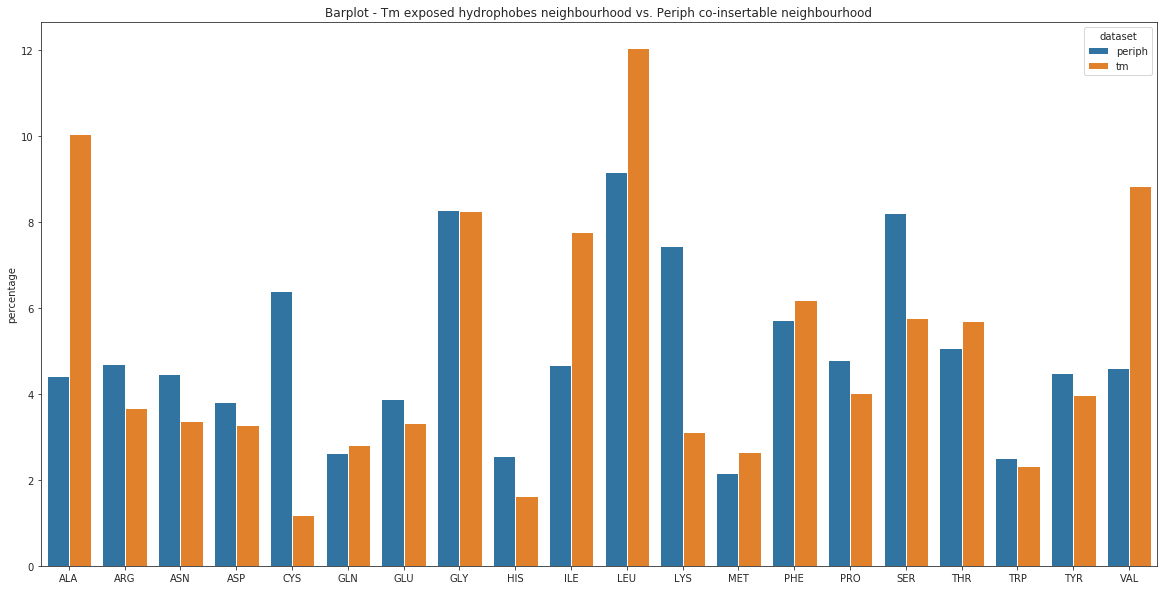

In [181]:
dd = tm_solvent_hydrophobes_neighbourhood["residue_name"].value_counts(normalize = True).mul(100) \
        .reset_index().sort_values("index")
dd.columns = ["residue_name", "percentage"]
dd["dataset"] = "tm"

dd2 = periph_co_insertable_neighbourhood["residue_name"].value_counts(normalize = True).mul(100) \
        .rename("percentage").reset_index().sort_values("index").reset_index(drop=True)
dd2.columns = ["residue_name", "percentage"]
dd2["dataset"] = "periph"

dd = dd2.append(dd)

plt.figure(figsize=(20,10))
sns.set_style("ticks")
sns.barplot(x="residue_name", y="percentage", hue="dataset", data=dd)
plt.title("Barplot - Tm exposed hydrophobes neighbourhood vs. Periph co-insertable neighbourhood")
plt.xlabel("")
plt.ylabel("percentage")
plt.savefig("../tmp1.png", dpi=300)
#plt.show()

<br>
<br>
<br>

In [176]:
# Finding exposed neighbourhood of interest (periph data)
matching_id = periph_co_insertable["matching_id"].to_numpy()
periph_co_insertable_neighbourhood = periph_neighbourhood_data.query("parent_matching_id in @matching_id")

matching_id = periph_co_insertable_neighbourhood["matching_id"].to_numpy()
periph_co_insertable_neighbourhood_sasa = periph_sasa_data.query("matching_id in @matching_id")

periph_co_insertable_neighbourhood_sasa = pd.merge(periph_co_insertable_neighbourhood, \
                                                   periph_co_insertable_neighbourhood_sasa[["matching_id", "sasa", "sasa_percentage"]], on='matching_id')
periph_co_insertable_neighbourhood_sasa = periph_co_insertable_neighbourhood_sasa.query("sasa_percentage >= 20")

In [178]:
# Finding exposed neighbourhood of interest (tm data)
matching_id = tm_solvent_hydrophobes["matching_id"].to_numpy()
tm_solvent_hydrophobes_neighbourhood = tm_neighbourhood_data.query("parent_matching_id in @matching_id")

matching_id = tm_solvent_hydrophobes_neighbourhood["matching_id"].to_numpy()
tm_solvent_hydrophobes_neighbourhood_sasa = tm_sasa_data.query("matching_id in @matching_id")

tm_solvent_hydrophobes_neighbourhood_sasa = pd.merge(tm_solvent_hydrophobes_neighbourhood, \
                                                     tm_solvent_hydrophobes_neighbourhood_sasa[["matching_id", "sasa", "sasa_percentage"]], on='matching_id')
tm_solvent_hydrophobes_neighbourhood_sasa = tm_solvent_hydrophobes_neighbourhood_sasa.query("sasa_percentage >= 20")

In [171]:
periph_co_insertable_neighbourhood_sasa

residue_number residue_name chain_id   pdb        sasa  \
121                 66          GLN        A  1kcm   71.673377   
127                 69          VAL        A  1kcm   44.618726   
129                 70          PRO        A  1kcm   73.391750   
131                 71          THR        A  1kcm   85.081590   
133                 72          PHE        A  1kcm  146.146168   
135                 73          VAL        A  1kcm   54.544248   
137                 74          ARG        A  1kcm  110.316647   
139                 75          MET        A  1kcm  141.868052   
141                 76          LEU        A  1kcm  142.412607   
143                 77          ALA        A  1kcm   35.743554   
...                ...          ...      ...   ...         ...   
486501              33          GLN        A  3d34  128.588565   
486503              34          TYR        A  3d34   36.357054   
486505              35          PRO        A  3d34   14.095502   
486507              36          LEU        A  3d34  119.114222   
486509              37          PHE        A  3d34  160.518852   
486511              38          ARG        A  3d34  192.595453   
486513              39          PRO        A  3d34   53.385000   
486515              40          PRO        A  3d34   68.417349   
486517              41          ALA        A  3d34    4.667071   
486769             172          SER        A  3d34   90.604305   

        sasa_percentage     matching_id  
121           28.107207   1kcm-GLN-66-A  
127           25.642946   1kcm-VAL-69-A  
129           46.158333   1kcm-PRO-70-A  
131           49.466041   1kcm-THR-71-A  
133           60.894237   1kcm-PHE-72-A  
135           31.347269   1kcm-VAL-73-A  
137           40.261550   1kcm-ARG-74-A  
139           63.333952   1kcm-MET-75-A  
141           70.852043   1kcm-LEU-76-A  
143           27.708181   1kcm-ALA-77-A  
...                 ...             ...  
486501        50.426888   3d34-GLN-33-A  
486503        13.823975   3d34-TYR-34-A  
486505         8.865096   3d34-PRO-35-A  
486507        59.260807   3d34-LEU-36-A  
486509        66.882855   3d34-PHE-37-A  
486511        70.290311   3d34-ARG-38-A  
486513        33.575472   3d34-PRO-39-A  
486515        43.029779   3d34-PRO-40-A  
486517         3.617885   3d34-ALA-41-A  
486769        58.454391  3d34-SER-172-A  

[4336 rows x 7 columns]

In [179]:
tm_solvent_hydrophobes_neighbourhood_sasa

residue_number chain_id residue_name   pdb parent_residue_name  \
7                   25        A          LYS  3pox                 PHE   
8                   26        A          GLY  3pox                 PHE   
13                  33        A          GLY  3pox                 PHE   
14                  33        A          GLY  3pox                 TYR   
15                  33        A          GLY  3pox                 MET   
19                  35        A          ASN  3pox                 PHE   
20                  35        A          ASN  3pox                 TYR   
21                  35        A          ASN  3pox                 MET   
26                 313        A          TYR  3pox                 PHE   
27                 313        A          TYR  3pox                 TYR   
...                ...      ...          ...   ...                 ...   
794291               5        P          VAL  2zt9                 ILE   
794295               1        P          MET  2zt9                 ILE   
794297               8        P          ILE  2zt9                 ILE   
794298               9        P          GLY  2zt9                 ILE   
794301              12        P          ALA  2zt9                 ILE   
794302              13        P          LEU  2zt9                 ILE   
794303              16        P          GLY  2zt9                 ILE   
794304              24        P          GLY  2zt9                 PHE   
794305              26        P          ARG  2zt9                 PHE   
794306              27        P          SER  2zt9                 PHE   

        parent_residue_number parent_residue_chain_id     matching_id  \
7                          23                       A   3pox-LYS-25-A   
8                          23                       A   3pox-GLY-26-A   
13                         23                       A   3pox-GLY-33-A   
14                         32                       A   3pox-GLY-33-A   
15                         38                       A   3pox-GLY-33-A   
19                         23                       A   3pox-ASN-35-A   
20                         32                       A   3pox-ASN-35-A   
21                         38                       A   3pox-ASN-35-A   
26                         23                       A  3pox-TYR-313-A   
27                         32                       A  3pox-TYR-313-A   
...                       ...                     ...             ...   
794291                      4                       P    2zt9-VAL-5-P   
794295                      4                       P    2zt9-MET-1-P   
794297                      4                       P    2zt9-ILE-8-P   
794298                      4                       P    2zt9-GLY-9-P   
794301                     17                       P   2zt9-ALA-12-P   
794302                     17                       P   2zt9-LEU-13-P   
794303                     17                       P   2zt9-GLY-16-P   
794304                     23                       P   2zt9-GLY-24-P   
794305                     23                       P   2zt9-ARG-26-P   
794306                     23                       P   2zt9-SER-27-P   

       parent_matching_id        sasa  sasa_percentage  
7           3pox-PHE-23-A  147.617378        62.549736  
8           3pox-PHE-23-A   72.762046        69.963505  
13          3pox-PHE-23-A   25.540165        24.557851  
14          3pox-TYR-32-A   25.540165        24.557851  
15          3pox-MET-38-A   25.540165        24.557851  
19          3pox-PHE-23-A   50.584787        25.940916  
20          3pox-TYR-32-A   50.584787        25.940916  
21          3pox-MET-38-A   50.584787        25.940916  
26          3pox-PHE-23-A   87.181517        33.148866  
27          3pox-TYR-32-A   87.181517        33.148866  
...                   ...         ...              ...  
794291       2zt9-ILE-4-P  100.355602        57.675633  
794295       2zt9-ILE-4-P  182.

In [182]:
dd = tm_solvent_hydrophobes_neighbourhood_sasa["residue_name"].value_counts(normalize = True).mul(100) \
        .reset_index().sort_values("index")
dd.columns = ["residue_name", "percentage"]
dd["dataset"] = "tm"

dd2 = periph_co_insertable_neighbourhood_sasa["residue_name"].value_counts(normalize = True).mul(100) \
        .rename("percentage").reset_index().sort_values("index").reset_index(drop=True)
dd2.columns = ["residue_name", "percentage"]
dd2["dataset"] = "periph"

dd = dd2.append(dd)

plt.figure(figsize=(20,10))
sns.set_style("ticks")
sns.barplot(x="residue_name", y="percentage", hue="dataset", data=dd)
plt.title("Barplot - Tm exposed hydrophobes exposed neighbourhood vs. Periph co-insertable exposed neighbourhood")
plt.xlabel("")
plt.ylabel("percentage")
plt.savefig("../tmp2.png", dpi=300)
#plt.show()

<br>
<br>
<br>

In [201]:
# =====================================================================================
# Finding neighbourhood of interest (tm data - non-protrusion & solvent hydrophobes)
# =====================================================================================

# Non protrusion data
tm_hydrophobes_not_protrusion = tm_protrusion_data[tm_protrusion_data["residue_name"].isin(HYDROPHOBICS)].query("is_protrusion == 0")

# Adding matching_id
tm_hydrophobes_not_protrusion["matching_id"] = tm_hydrophobes_not_protrusion["pdb"] + "-" + tm_hydrophobes_not_protrusion["residue_name"] + "-" + \
    tm_hydrophobes_not_protrusion["residue_number"].astype(str) + "-" + tm_hydrophobes_not_protrusion["chain_id"]
matching_id = tm_hydrophobes_not_protrusion["matching_id"].to_numpy()

# Subset exposed hydrophobes
matching_id = tm_sasa_data.query("matching_id in @matching_id & sasa_percentage >= 20")["matching_id"].to_numpy()

# Find neighbours 
matching_id = tm_neighbourhood_data.query("matching_id in @matching_id")["matching_id"].to_numpy()

# Find exposed neighbours
tm_result = tm_sasa_data.query("matching_id in @matching_id")
tm_result = tm_result.query("sasa_percentage >= 20")


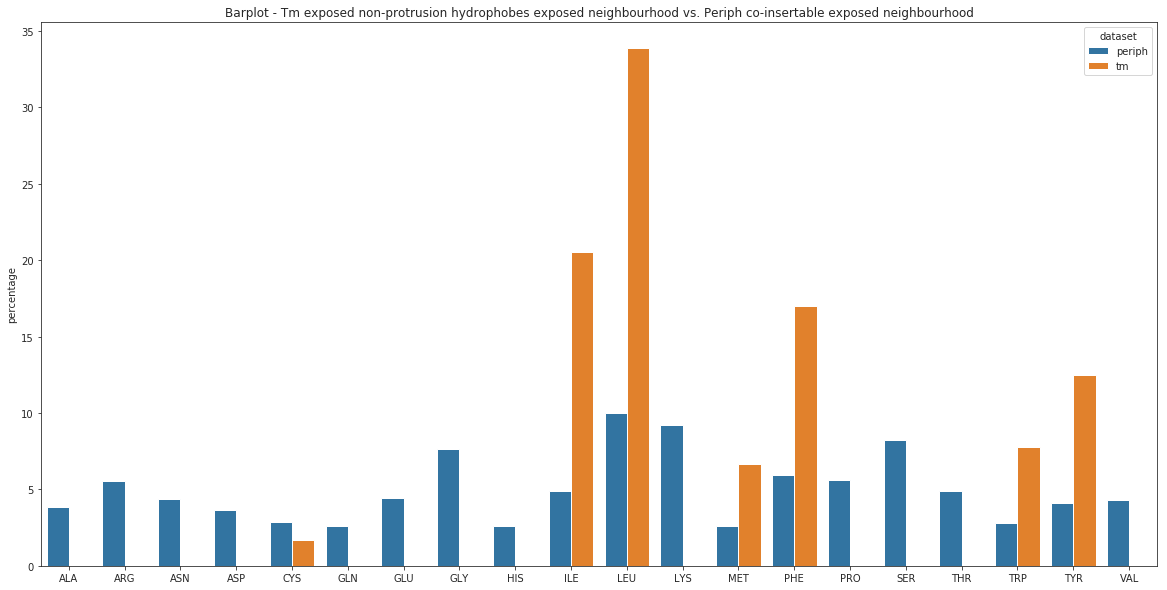

In [214]:
dd = tm_result["residue_name"].value_counts(normalize = True).mul(100).reset_index().sort_values("index")
dd.columns = ["residue_name", "percentage"]
dd["dataset"] = "tm"

dd2 = periph_co_insertable_neighbourhood_sasa["residue_name"].value_counts(normalize = True).mul(100) \
        .reset_index().sort_values("index").reset_index(drop=True)
dd2.columns = ["residue_name", "percentage"]
dd2["dataset"] = "periph"

dd = dd2.append(dd)

plt.figure(figsize=(20,10))
sns.set_style("ticks")
sns.barplot(x="residue_name", y="percentage", hue="dataset", data=dd)
plt.title("Barplot - Tm exposed non-protrusion hydrophobes exposed neighbourhood vs. Periph co-insertable exposed neighbourhood")
plt.xlabel("")
plt.ylabel("percentage")
plt.savefig("../tmp1.png", dpi=300)
#plt.show()

In [208]:
# =====================================================================================
# Finding neighbourhood of interest (periph data - non-protrusion & solvent hydrophobes)
# =====================================================================================

# Non protrusion data
periph_hydrophobes_not_protrusion = periph_protrusion_data[periph_protrusion_data["residue_name"].isin(HYDROPHOBICS)].query("is_protrusion == 0")

# Adding matching_id
periph_hydrophobes_not_protrusion["matching_id"] = periph_hydrophobes_not_protrusion["pdb"] + "-" + periph_hydrophobes_not_protrusion["residue_name"] + "-" + \
    periph_hydrophobes_not_protrusion["residue_number"].astype(str) + "-" + periph_hydrophobes_not_protrusion["chain_id"]
matching_id = periph_hydrophobes_not_protrusion["matching_id"].to_numpy()

# Subset exposed hydrophobes
matching_id = periph_sasa_data.query("matching_id in @matching_id & sasa_percentage >= 20")["matching_id"].to_numpy()

# Find neighbours 
matching_id = periph_neighbourhood_data.query("matching_id in @matching_id")["matching_id"].to_numpy()

# Find exposed neighbours
periph_result = periph_sasa_data.query("matching_id in @matching_id")
periph_result = periph_result.query("sasa_percentage >= 20")

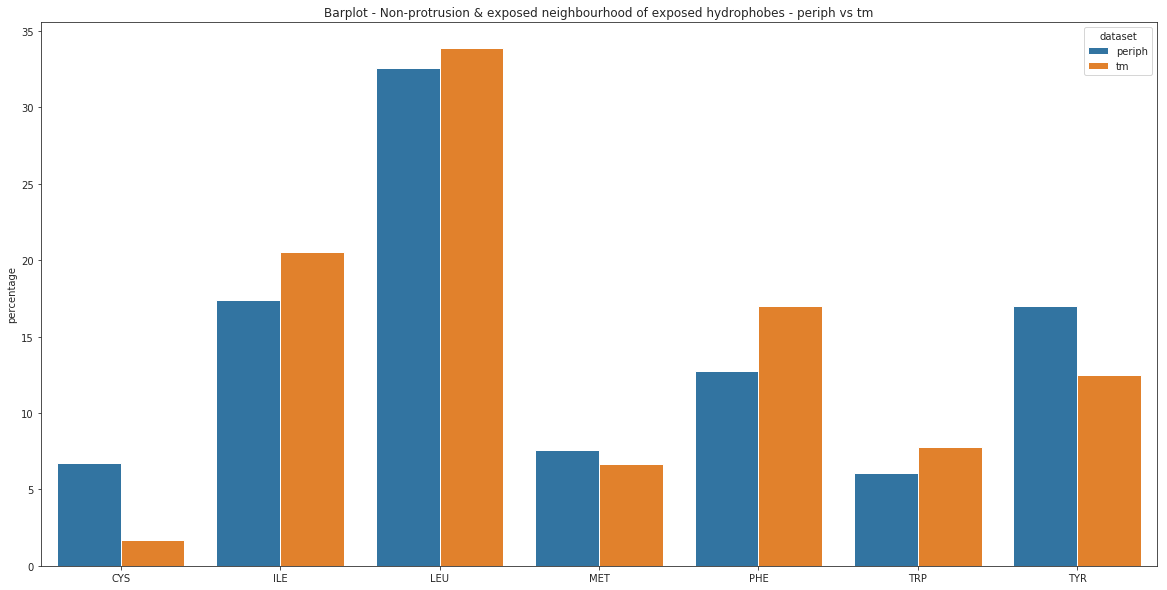

In [215]:
dd = tm_result["residue_name"].value_counts(normalize = True).mul(100).reset_index().sort_values("index")
dd.columns = ["residue_name", "percentage"]
dd["dataset"] = "tm"

dd2 = periph_result["residue_name"].value_counts(normalize = True).mul(100).reset_index().sort_values("index")
dd2.columns = ["residue_name", "percentage"]
dd2["dataset"] = "periph"

dd = dd2.append(dd)

plt.figure(figsize=(20,10))
sns.set_style("ticks")
sns.barplot(x="residue_name", y="percentage", hue="dataset", data=dd)
plt.title("Barplot - Non-protrusion & exposed neighbourhood of exposed hydrophobes - periph vs tm")
plt.xlabel("")
plt.ylabel("percentage")
plt.savefig("../tmp2.png", dpi=300)
#plt.show()

In [213]:
print("len periph: " + str(len(periph_result)))
print("len tm: " + str(len(tm_result)))

len periph: 15842
len tm: 48974


In [217]:
periph_co_insertable_neighbourhood_sasa

residue_number chain_id residue_name   pdb parent_residue_name  \
0                 69        A          VAL  1kcm                 PHE   
1                 69        A          VAL  1kcm                 MET   
2                 69        A          VAL  1kcm                 LEU   
3                 70        A          PRO  1kcm                 PHE   
4                 70        A          PRO  1kcm                 MET   
5                 70        A          PRO  1kcm                 LEU   
6                 71        A          THR  1kcm                 PHE   
7                 71        A          THR  1kcm                 MET   
8                 71        A          THR  1kcm                 LEU   
9                 73        A          VAL  1kcm                 PHE   
...              ...      ...          ...   ...                 ...   
6624              33        A          GLN  3d34                 LEU   
6629              37        A          PHE  3d34                 LEU   
6630              38        A          ARG  3d34                 LEU   
6631              38        A          ARG  3d34                 PHE   
6632              39        A          PRO  3d34                 LEU   
6633              39        A          PRO  3d34                 PHE   
6634              40        A          PRO  3d34                 LEU   
6635              40        A          PRO  3d34                 PHE   
6638              36        A          LEU  3d34                 PHE   
6639             172        A          SER  3d34                 PHE   

      parent_residue_number parent_residue_chain_id     matching_id  \
0                        72                       A   1kcm-VAL-69-A   
1                        75                       A   1kcm-VAL-69-A   
2                        76                       A   1kcm-VAL-69-A   
3                        72                       A   1kcm-PRO-70-A   
4                        75                       A   1kcm-PRO-70-A   
5                        76                       A   1kcm-PRO-70-A   
6                        72                       A   1kcm-THR-71-A   
7                        75                       A   1kcm-THR-71-A   
8                        76                       A   1kcm-THR-71-A   
9                        72                       A   1kcm-VAL-73-A   
...                     ...                     ...             ...   
6624                     36                       A   3d34-GLN-33-A   
6629                     36                       A   3d34-PHE-37-A   
6630                     36                       A   3d34-ARG-38-A   
6631                     37                       A   3d34-ARG-38-A   
6632                     36                       A   3d34-PRO-39-A   
6633                     37                       A   3d34-PRO-39-A   
6634                     36                       A   3d34-PRO-40-A   
6635                     37                       A   3d34-PRO-40-A   
6638                     37                       A   3d34-LEU-36-A   
6639                     37                       A  3d34-SER-172-A   

     parent_matching_id        sasa  sasa_percentage  
0         1kcm-PHE-72-A   44.618726        25.642946  
1         1kcm-MET-75-A   44.618726        25.642946  
2         1kcm-LEU-76-A   44.618726        25.642946  
3         1kcm-PHE-72-A   73.391750        46.158333  
4         1kcm-MET-75-A   73.391750        46.158333  
5         1kcm-LEU-76-A   73.391750        46.158333  
6         1kcm-PHE-72-A   85.081590        49.466041  
7         1kcm-MET-75-A   85.081590        49.466041  
8         1kcm-LEU-76-A   85.081590        49.466041  
9         1kcm-PHE-72-A   54.544248        31.347269  
...                 ...         ...              ...  
6624      3d34-LEU-36-A  128.588565        50.426888  
6629      3d34-LEU-36-A  160.518852        66.882855  
6630      3d34-LEU-36-A  192.595453        70.290311  
6631      3d34-PHE-37-A  192.5954